# ECG Recurrence Plot Analysis (MIT-BIH Record 100)

## 📌 Objective:
### Generate and compare recurrence plots for normal and atrial premature ECG beats using RQA metrics

### Step #1:

The below code imports the necessary libraries for ECG signal processing and recurrence plot generation using the MIT-BIH dataset. It includes tools for waveform reading (wfdb), numerical computation (numpy), plotting (matplotlib), and recurrence visualization (pyts).

In [1]:
# ---- STEP 1: Load Dependencies ----
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot
from collections import defaultdict
print('Done')

Done


## Step #2:

The below code loads ECG signal data and its annotations for Record 100 from the MIT-BIH Arrhythmia Database using the wfdb library, enabling access to both waveform samples and corresponding heartbeat labels.

In [2]:
# ---- STEP 2: Load ECG Record (Record 100) ----
record_path = r"C:\Users\Maverick\Downloads\mitdb_files\100"  # Update path as needed
record = wfdb.rdrecord(record_path)
annotation = wfdb.rdann(record_path, 'atr')

## Step #3:

The below code extracts the MLII lead from the ECG signal and normalizes it using z-score normalization, ensuring the data has zero mean and unit variance for consistent analysis.

In [3]:
# ---- STEP 3: Normalize ECG Signal (Channel: MLII) ----
ecgsig = record.p_signal[:, 0]  # MLII
fs = record.fs
normalized_ecg = (ecgsig - np.mean(ecgsig)) / np.std(ecgsig)

## Step #4:

The below code organizes ECG beats by their annotation type (e.g., normal, atrial) by mapping each beat label to its corresponding sample index, enabling class-wise analysis of heartbeat patterns.

In [4]:
# ---- STEP 4: Organize Beats by Type ----
beat_indices = defaultdict(list)
for i, label in enumerate(annotation.symbol):
    beat_indices[label].append(annotation.sample[i])

## Step #5:

The below code defines a function to generate a recurrence plot from a segment of the ECG signal, capturing its underlying temporal dynamics using distance-based thresholding via the RecurrencePlot class from pyts.

In [5]:
# ---- STEP 5: Define Recurrence Plot Generator ----
def generate_rp(ecg_signal, start_idx, length=1000, threshold='point', percentage=10):
    segment = ecg_signal[start_idx : start_idx + length]
    rp = RecurrencePlot(threshold=threshold, percentage=percentage)
    return rp.fit_transform(segment.reshape(1, -1))[0]

## Step #6:

The below code defines a function to compute key Recurrence Quantification Analysis (RQA) metrics—Determinism (DET) and Entropy (ENTR)—from a recurrence plot, quantifying the predictability and complexity of patterns in the signal.

In [6]:
# ---- STEP 6: Define RQA Metric Functions ----
def compute_rqa_measures(rp, l_min=2):
    N = rp.shape[0]
    diag_lengths = []
    for k in range(-N + 1, N):
        diag = np.diag(rp, k)
        count = 0
        for val in diag:
            if val:
                count += 1
            else:
                if count >= l_min:
                    diag_lengths.append(count)
                count = 0
        if count >= l_min:
            diag_lengths.append(count)
    if not diag_lengths:
        return 0, 0
    det = sum(diag_lengths) / np.sum(rp)
    entr = np.sum([l * np.log(l) for l in diag_lengths]) / len(diag_lengths)
    return det, entr

## Step #7:

The below code generates recurrence plots for multiple normal ('N') and atrial premature ('A') beats, then computes the average recurrence plot for each class to highlight typical structural differences between normal and abnormal ECG patterns.

In [7]:
# ---- STEP 7: Generate and Compare RPs for Multiple N and A Beats ----
normal_indices = beat_indices['N'][100:110]
atrial_indices = beat_indices['A'][0:10]

normal_rps = [generate_rp(normalized_ecg, idx - 500) for idx in normal_indices]
atrial_rps = [generate_rp(normalized_ecg, idx - 500) for idx in atrial_indices]

avg_rp_normal = np.mean(normal_rps, axis=0)
avg_rp_atrial = np.mean(atrial_rps, axis=0)

## Step #8:

The below code visualizes the average recurrence plots for normal and atrial premature beats side-by-side, allowing for a comparative analysis of their temporal dynamics and structural recurrence patterns.

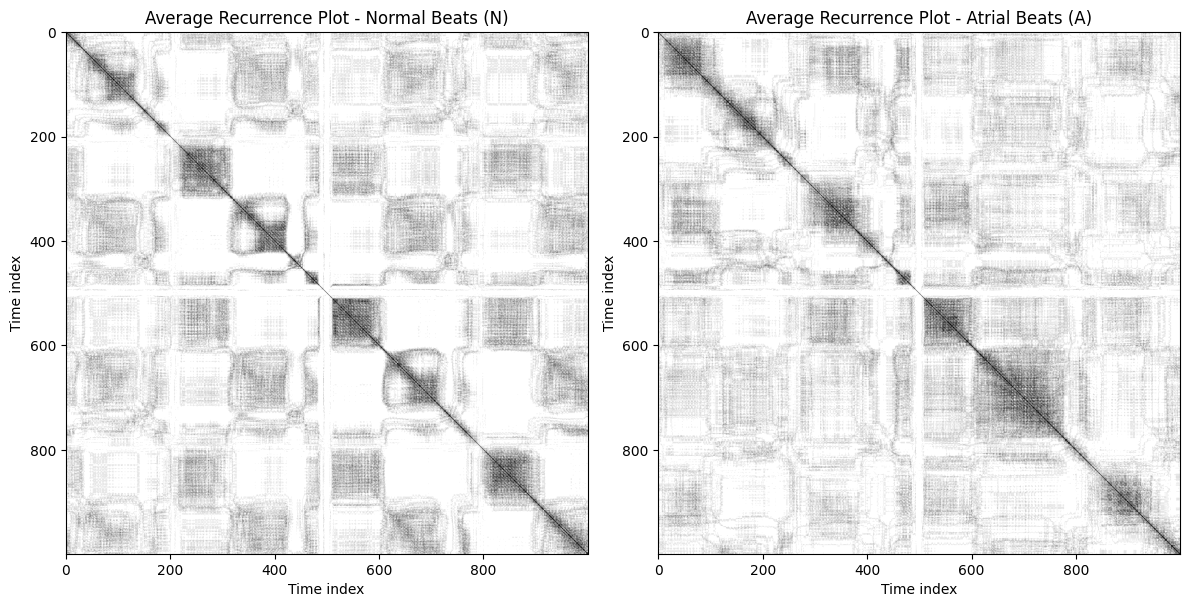

In [8]:
# ---- STEP 8: Plot Average Recurrence Plots Side-by-Side ----
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(avg_rp_normal, cmap='binary')
axs[0].set_title("Average Recurrence Plot - Normal Beats (N)")
axs[0].set_xlabel("Time index")
axs[0].set_ylabel("Time index")

axs[1].imshow(avg_rp_atrial, cmap='binary')
axs[1].set_title("Average Recurrence Plot - Atrial Beats (A)")
axs[1].set_xlabel("Time index")
axs[1].set_ylabel("Time index")

plt.tight_layout()
plt.show()

## Inference from the above plot

🔍 Observations

    The Normal Beats (left plot) exhibit a more regular, grid-like recurrence structure with consistent block patterns, indicating stable periodicity.

    The Atrial Premature Beats (right plot) show less regularity and more chaotic textures, particularly in the lower-right region, suggesting variability and disruption in the signal dynamics.

📌 Significance

    Recurrence plots visualize how often a signal returns to a previous state, capturing nonlinear dynamics that traditional time-domain methods may miss.

    The distinction in structure between the two classes provides visual evidence of physiological differences between normal sinus rhythm and arrhythmic activity.

💡 Impact

    These plots offer a valuable tool for automated classification or diagnostic support, especially when combined with quantitative Recurrence Quantification Analysis (RQA) metrics.

    They enable researchers to capture subtle heartbeat variations even in noisy or complex ECG data.

📈 Implication

    The increased irregularity in the atrial plots suggests greater signal complexity or unpredictability, which aligns with the expected behavior of premature atrial contractions (PACs).

    This supports the use of recurrence-based methods as a viable feature extraction technique for arrhythmia detection and ECG-based risk assessment in medical AI models.

## Step #9:

The below code plots the raw, normalized ECG signals centered around one normal beat and one atrial premature beat, providing a time-domain view to visually compare the morphological differences between the two heartbeat types.

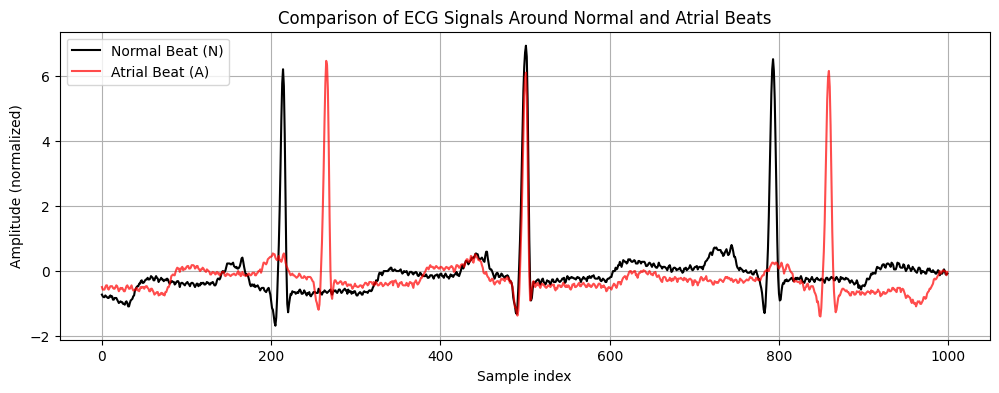

In [12]:
# ---- STEP 9: Plot Raw ECG Signals Around a Sample Beat (Combined) ----
plt.figure(figsize=(12, 4))
plt.plot(normalized_ecg[normal_indices[0]-500:normal_indices[0]+500], label='Normal Beat (N)', color='black')
plt.plot(normalized_ecg[atrial_indices[0]-500:atrial_indices[0]+500], label='Atrial Beat (A)', color='red', alpha=0.7)
plt.title("Comparison of ECG Signals Around Normal and Atrial Beats")
plt.xlabel("Sample index")
plt.ylabel("Amplitude (normalized)")
plt.grid(True)
plt.legend()
plt.show()

## Inference from the above plot

🔍 Observations

The "Normal Beat (N)" (black line) shows a consistent and regular waveform morphology with clear P, QRS, and T waves. The amplitude and timing of these waves appear relatively stable across the plotted cycles.

The "Atrial Beat (A)" (red line) also exhibits a P, QRS, and T wave morphology, but there are noticeable differences compared to the normal beat. Specifically, the P wave preceding the QRS complex in the atrial beat often appears altered in morphology or timing, and there can be slight variations in the QRS complex and T wave shape or duration. For instance, around sample index 250, the atrial beat shows a P wave that is either absent or merged, followed by a QRS complex with a slightly different peak amplitude compared to the normal beat at similar locations. Similarly, around sample index 850, the P wave of the atrial beat is clearly distinct and appears earlier relative to the QRS complex, which is characteristic of an atrial premature contraction.

📌 Significance

The plot directly illustrates the morphological and temporal differences between a normal sinus beat and an atrial premature beat in the time domain. This visual distinction is crucial for understanding how arrhythmias manifest in ECG signals.

The consistency of the normal beat highlights the typical physiological rhythm of the heart, while the variations in the atrial beat point to an ectopic (abnormal) electrical impulse originating in the atria.

💡 Impact

This type of visualization is fundamental for training and validating algorithms designed for automated ECG analysis and arrhythmia detection. The clear visual separation of normal and atrial beats allows for the development of feature extraction techniques that can quantitatively distinguish between these two classes.

For clinicians, such plots reinforce their understanding of ECG interpretation, aiding in the diagnosis of atrial arrhythmias.

📈 Implication

The discernible differences in waveform morphology and timing between normal and atrial beats suggest that these characteristics can serve as robust features for machine learning models aiming to classify cardiac rhythms.

This supports the idea that even simple time-domain analysis, by comparing individual

## Step #10:

The below code calculates and plots the RR intervals (time between consecutive heartbeats) for the first 300 beats, helping to visualize heart rate variability and detect potential arrhythmias.

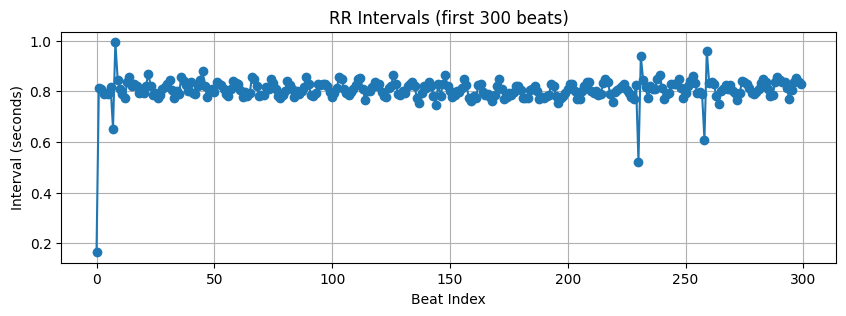

In [10]:
# ---- STEP 10: RR Interval Analysis ----
rr_intervals = np.diff(annotation.sample) / fs
plt.figure(figsize=(10, 3))
plt.plot(rr_intervals[:300], marker='o', linestyle='-')
plt.title("RR Intervals (first 300 beats)")
plt.xlabel("Beat Index")
plt.ylabel("Interval (seconds)")
plt.grid(True)
plt.show()

## Inference from the above plot

🔍 Observations

The plot displays the RR intervals (time between consecutive heartbeats) for the first 300 beats. Most of the intervals are clustered around approximately 0.8 seconds, indicating a fairly consistent heart rate.

However, there are several distinct anomalies:
    Near the beginning (Beat Index ~0-5), there's a very short interval followed by a very long one (around 0.15s and 1.0s respectively), suggesting an irregular rhythm.
    Around Beat Index 230, there's a significantly shorter interval (around 0.5 seconds) followed by a slightly longer one (around 0.95 seconds).
    Around Beat Index 255-260, a similar pattern of a short interval (around 0.6 seconds) followed by a longer one (around 0.95 seconds) is observed.
These abrupt changes in the RR interval indicate irregularities in the heart rhythm, likely due to premature beats.

📌 Significance

RR interval analysis is a crucial tool for assessing heart rate variability (HRV) and detecting arrhythmias. Deviations from a regular, narrow range of RR intervals are strong indicators of cardiac abnormalities.

The plot visually highlights instances of irregular heartbeats, which could correspond to premature contractions (e.g., atrial or ventricular premature beats) or other rhythm disturbances.

💡 Impact

This type of visualization provides a quick and intuitive way to identify abnormal heart rhythms from ECG data. It can be used for initial screening or for pinpointing specific regions in the ECG signal that require further detailed analysis.

For automated systems, features derived from RR interval series (like standard deviation of RR intervals, root mean square of successive differences, etc.) are highly effective for arrhythmia detection and classification.

📈 Implication

The presence of marked fluctuations in the RR intervals, especially the sudden short-long sequences, strongly implies the occurrence of premature beats within the recording. This aligns with the expected physiological impact of such arrhythmias on heart rhythm.

This supports the utility of RR interval plots and derived HRV metrics as valuable featur

## Step #11:

The below code calculates and prints key Recurrence Quantification Analysis (RQA) metrics—Recurrence Rate, Determinism (DET), and Entropy (ENTR)—for a sample normal and atrial beat, quantitatively comparing the complexity and predictability of their recurrence structures.

In [11]:
# ---- STEP 11: RQA Metrics - Recurrence Rate, DET, and ENTR ----
def recurrence_rate(rp):
    return np.sum(rp) / rp.size

rp_n = normal_rps[0]
rp_a = atrial_rps[0]

rr_n = recurrence_rate(rp_n)
rr_a = recurrence_rate(rp_a)

det_n, entr_n = compute_rqa_measures(rp_n)
det_a, entr_a = compute_rqa_measures(rp_a)

print("📈 RQA Metrics for Sample Normal Beat:")
print(f"Recurrence Rate: {rr_n:.4f}")
print(f"Determinism (DET): {det_n:.4f}")
print(f"Entropy (ENTR): {entr_n:.4f}")

print("\n📉 RQA Metrics for Sample Atrial Premature Beat:")
print(f"Recurrence Rate: {rr_a:.4f}")
print(f"Determinism (DET): {det_a:.4f}")
print(f"Entropy (ENTR): {entr_a:.4f}")

📈 RQA Metrics for Sample Normal Beat:
Recurrence Rate: 0.0979
Determinism (DET): 0.7750
Entropy (ENTR): 4.4450

📉 RQA Metrics for Sample Atrial Premature Beat:
Recurrence Rate: 0.0981
Determinism (DET): 0.7132
Entropy (ENTR): 3.8044


## Inference from the above RQA Metrics

🔍 Observations

**Recurrence Rate (RR):** The Recurrence Rates for both the Normal Beat (0.0979) and the Atrial Premature Beat (0.0981) are very similar. This suggests that, on average, both types of beats return to a similar state with roughly the same frequency within their respective recurrence plots.

**Determinism (DET):** The Normal Beat has a higher Determinism (0.7750) compared to the Atrial Premature Beat (0.7132). Determinism measures the proportion of recurrence points that form diagonal lines, indicating predictable and repetitive patterns in the signal. A higher DET for the normal beat implies more regularity and predictability.

**Entropy (ENTR):** The Normal Beat has a higher Entropy (4.4450) than the Atrial Premature Beat (3.8044). Entropy in RQA quantifies the complexity of the deterministic structures in the recurrence plot. A higher entropy typically indicates more complex, but still predictable, patterns.

📌 Significance

**Recurrence Rate:** The similar Recurrence Rates suggest that the overall density of recurrence points is comparable, meaning both signals spend a similar proportion of time revisiting previous states. This metric alone might not distinguish well between the two beat types.

**Determinism:** The clear difference in Determinism is significant. The higher DET for the normal beat confirms its more stable and regular physiological dynamics, characteristic of a healthy sinus rhythm. The lower DET for the atrial beat indicates less predictable and more chaotic dynamics, which is consistent with the irregular nature of premature beats.

**Entropy:** The difference in Entropy, particularly the higher value for the normal beat, is somewhat counter-intuitive if one associates higher entropy directly with more "randomness." In RQA, higher entropy for deterministic structures (as indicated by DET) often means a richer and more varied set of recurring patterns, while a lower entropy can indicate a simpler, less diverse set of patterns, possibly due to a disruption in the underlying dynamics. The lower entropy for the atrial beat, despite its "irregularity," could suggest that the "deterministic" parts of its recurrence plot are less complex or diverse due to the premature activation.

💡 Impact

The RQA metrics, particularly Determinism and Entropy, provide quantitative evidence to support the visual observations from recurrence plots. They translate the structural differences into numerical values, making them suitable for automated analysis and classification.

These metrics can serve as powerful features for machine learning models aimed at distinguishing between normal and abnormal cardiac rhythms. The distinct values for DET and ENTR between the two beat types indicate their potential as discriminative features.

📈 Implication

The results strongly imply that Determinism and Entropy are valuable features for differentiating between normal and atrial premature beats. The normal beat's higher determinism aligns with its stable, periodic nature, while the atrial beat's lower determinism reflects its more erratic behavior.

The combination of these RQA metrics can be used to build robust algorithms for autom